순차데이터 : 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
-> 이전에 입력한 데이터를 기억하는 기능이 필요함
지금까지 배운 DNN, CNN 모두 기억장치가 없이 샘플은 수행 후 재사용되지 않으며
입력 데이터의 흐름이 앞으로만 전달되는 피드포워드 신경망이다.

9장에서 배울 신경망은 다음 샘플을 위해 이전 데이터가 신경망층에 순환될 필요가 있다. 이것이 순환 신경망이다!

입력층->은닉층(순환됨)
CNN과 같이 입력과 가중치를 곱하는데! 순환신경망은 이전 타임스텝의 은닉 상태에
곱해지는 가중치가 추가로 있음!

그리고 활성화 함수는 tanh 함수를 쓴다(-1~1 값)

순환신경망(RNN)의 타임스텝은 순차 데이터를 처리하는 각 단계를 의미하며, 예를 들어 "The movie is"라는 문장을 단어 단위로 처리한다면 타임스텝은 3개가 됩니다. RNN은 각 타임스텝마다 은닉층이 이전 타임스텝의 출력을 다시 입력으로 받아 재귀적으로 활동하기 때문에 "순환"이라고 부릅니다.​

순환의 의미
"순환"이라는 표현은 은닉층의 출력이 자기 자신에게 다시 입력으로 연결되는 구조에서 유래합니다. 일반 신경망은 앞 층에서 뒤 층으로만 신호가 전달되지만, RNN은 시간 축을 따라 펼쳐 보면(unfolding) 은닉층이 계속해서 자신의 이전 상태를 참조하며 순환하는 형태를 보입니다. 이러한 구조 덕분에 RNN은 시퀀스의 시간적 패턴과 의존성을 학습할 수 있습니다.​

타임스텝 제한의 필요성
RNN은 역전파 시 타임스텝을 거슬러 올라가며 동일한 가중치를 반복해서 곱하기 때문에 그래디언트가 너무 커지거나 작아지는 문제(gradient vanishing/exploding)가 발생할 수 있습니다. 따라서 실제로는 타임스텝 수를 제한하는 TBTT(Truncated Backpropagation Through Time) 기법을 사용하며, 더 긴 시퀀스를 처리하기 위해 LSTM이나 GRU 같은 개선된 구조가 개발되었습니다.



IMDB 리뷰 데이터셋을 이용한 RNN!
띄워쓰기를 기준으로 분리된 단어를 토큰!
1개의 샘플은 여러개의 토큰(단어)로 이루어져 있다.
토큰은 고유의 정수를 할당받아 있는데 몇몇 정수는
사전에 예약(합의)되어 있음
0 : 패딩, 1:문장시작, 2:모르는 단어
예를 들어 HE:10, CAT:13일 때 CAT>HE 이건 말이 안됨!
정수는 숫자의 개념이 아니라 라벨링 개념임(컴퓨터는 숫자를 인식하니까)

In [ ]:
from keras.datasets import imdb
(train_input, train_target),(test_input, test_target) = imdb.load_data(
    num_words=200
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
#첫 번째 리뷰는 218개 토큰으로 이루어짐

218


In [ ]:
print(len(train_input[1]))
#두 번째 리뷰는 189개 토큰으로 이루어짐

189


In [ ]:
print(train_input[0])
#정수로 라벨링된 토큰이 218개
#모르는 단어=2
#imbd.load_data()함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 뒤 가장 많이 등장하는 단어를 선택함
#우리는 200개만 쓰기로 함

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])
#target은 이진분류로 0=부정, 1=긍정으로 나타냄

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target=train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [ ]:
import numpy as np
lengths=np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths),np.median(lengths))

239.00925 178.0


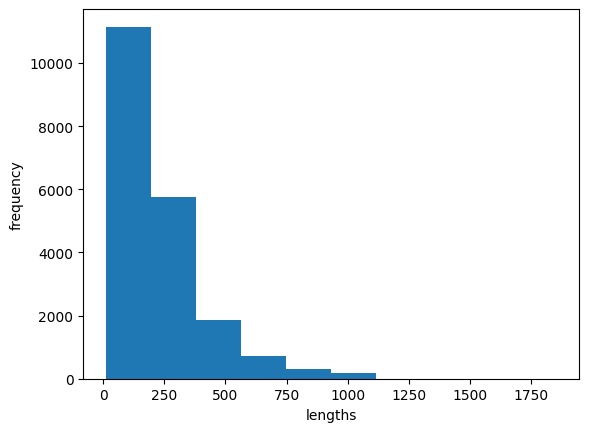

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [ ]:
val_seq=pad_sequences(val_input, maxlen=100)

In [ ]:
import keras

model=keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 200)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh=keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                              save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model.fit(train_oh, train_target, epochs=100, batch_size=64,
                  validation_data=(val_oh, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.4971 - loss: 0.7074 - val_accuracy: 0.5468 - val_loss: 0.6860
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.5945 - loss: 0.6654 - val_accuracy: 0.6842 - val_loss: 0.6022
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6934 - loss: 0.5934 - val_accuracy: 0.7096 - val_loss: 0.5757
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7144 - loss: 0.5662 - val_accuracy: 0.7034 - val_loss: 0.5706
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.7152 - loss: 0.5609 - val_accuracy: 0.7236 - val_loss: 0.5527
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.7240 - loss: 0.5517 - val_accuracy: 0.7282 - val_loss: 0.5505
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7300 - loss: 0.5415 - val_accuracy: 0.7264 - val_loss: 0.5512
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.7299 - loss: 0.5

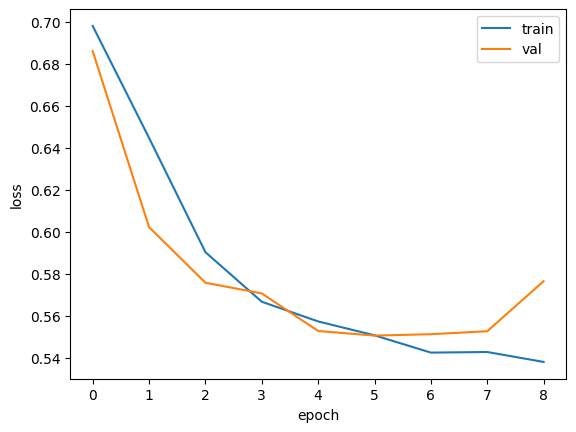

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 3200000000


In [ ]:
(train_input, train_target),(test_input, test_target)=imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target=train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)
train_seq=pad_sequences(train_input, maxlen=100)
val_seq=pad_sequences(val_input, maxlen=100)

In [ ]:
model_emb=keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500,16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_emb.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

마지막 은닉 상태만 전달하는 의미
**"순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달합니다"**는 말은, RNN이 순차 데이터(예: 문장)를 처음부터 끝까지 다 읽은 후, 중간 과정은 버리고 최종 요약 정보만 다음 층으로 넘긴다는 뜻입니다.​

타임스텝과 은닉 상태
RNN은 시계열 데이터를 순차적으로 처리하는데, 이때 각 단계를 타임스텝(time step) 이라고 부릅니다. 예를 들어 "오늘 날씨가 좋다"라는 문장이 있으면 각 단어("오늘", "날씨가", "좋다")가 하나의 타임스텝이 됩니다. RNN은 각 타임스텝마다 은닉 상태(hidden state) 를 계산하는데, 이는 "지금까지 읽은 내용에 대한 요약된 기억"입니다. 첫 번째 단어를 읽으면
h
1
h
1
 , 두 번째 단어까지 읽으면
h
2
h
2
 , 이런 식으로 계속 업데이트됩니다.​

마지막 타임스텝만 전달
여기서 핵심은, RNN이 모든 타임스텝에서 은닉 상태(
h
1
,
h
2
,
.
.
.
,
h
t
h
1
 ,h
2
 ,...,h
t
 )를 계산하지만, 다음 층(주로 출력층)으로는 마지막 타임스텝의 은닉 상태
h
t
h
t
  하나만 전달한다는 점입니다. 마지막 은닉 상태는 전체 시퀀스의 정보를 압축한 것으로 간주되며, 이는 문장 전체를 읽고 난 후의 "최종 이해"를 나타냅니다. 케라스(Keras) 같은 프레임워크에서 return_sequences=False로 설정하면 이런 동작이 일어나며, 출력 차원이 (batch_size, hidden_dim)인 2D 텐서가 됩니다.​

언제 사용하나요?
이 방식은 주로 다 대 일(many-to-one) 문제에 사용됩니다. 예를 들어 영화 리뷰 전체 문장을 읽고 "긍정/부정" 하나의 감성을 분류하는 작업에서, 전체 문장의 의미를 담은 마지막 은닉 상태만 있으면 충분하기 때문입니다. 반대로 return_sequences=True로 설정하면 모든 타임스텝의 은닉 상태를 전달하여 (batch_size, timesteps, hidden_dim)인 3D 텐서가 출력되며, 이는 번역이나 품사 태깅처럼 각 단어마다 출력이 필요한 다 대 다(many-to-many) 문제나 RNN 층을 여러 개 쌓을 때 사용됩니다.​